In [247]:
import pandas as pd
from tqdm import tqdm
import sys
import os
import matplotlib.pyplot as plt

# Agregar la ruta de la carpeta `src` al path
sys.path.append(os.path.abspath('../src'))

# Importar los diccionarios específicos
from diccionarios import traducciones_origen_ingreso, traducciones_tipo_ingreso


In [248]:
# Leemos las 3 partes del csv
df1 = pd.read_csv('../datos/result/datos_brasil_unificado_1.csv')
df2 = pd.read_csv('../datos/result/datos_brasil_unificado_2.csv')
df3 = pd.read_csv('../datos/result/datos_brasil_unificado_3.csv')

In [249]:
# Unimos las 3 partes
df_unido=pd.concat([df1,df2,df3])

In [250]:
# Comprobamos union
df_unido.shape

(765639, 16)

In [251]:
# Iniciamos EDA viendo las columnas y los tipos de datos que contienen, recordar que ya se hizo limpieza de nulos y duplicados en el anterior notebook
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR        float64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                 float64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA         float64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO     object
VALOR_LANZADO                  object
VALOR_REALIZADO                object
PORCENTAJE_REALIZADO           object
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [252]:
# Convertimos los codigos en numeros enteros
df_unido['CODIGO_ORGANO_SUPERIOR']=df_unido['CODIGO_ORGANO_SUPERIOR'].astype(int)
df_unido['CODIGO_ORGANO']=df_unido['CODIGO_ORGANO'].astype(int)
df_unido['CODIGO_UNIDAD_GESTORA']=df_unido['CODIGO_UNIDAD_GESTORA'].astype(int)

In [253]:
# Comprobamos valores unicos de estas columnas
print(df_unido['CATEGORIA_ECONOMICA'].unique())
print(df_unido['ORIGEN_INGRESO'].unique())
print(df_unido['TIPO_INGRESO'].unique())

['Receitas Correntes' 'Receitas de Capital'
 'Receitas Correntes - intra-orçamentárias' 'Sem informação'
 'Receitas de Capital - intra-orçamentárias']
['Outras Receitas Correntes' 'Receita de Serviços'
 'Transferências de Capital' 'Alienação de Bens' 'Receita Agropecuária'
 'Transferências Correntes' 'Receita Patrimonial'
 'Impostos, Taxas e Contribuições de Melhoria'
 'Amortizações de Empréstimos' 'Contribuições' 'Receita Industrial'
 'Outras Receitas de Capital' 'Operações de Crédito' 'Sem informação'
 'Receitas Correntes - a classificar']
['Bens, Direitos e Valores Incorporados ao Patr'
 'Indenizações, restituições e ressarcimentos'
 'Multas administrativas, contratuais e judicia'
 'Demais receitas correntes' 'Receita de Serviços'
 'Transferências de Instituições Privadas' 'Alienação de bens móveis'
 'Receita da produção animal e derivados'
 'Transferências dos Municípios e de suas Entid'
 'Alienação de bens imóveis' 'Transferências de Pessoas Físicas'
 'Valores Mobiliários' 'Explor

In [254]:
# Traducimos las columnas que nos interesan y mas extensas
df_unido['ORIGEN_INGRESO'] = df_unido['ORIGEN_INGRESO'].map(traducciones_origen_ingreso)
df_unido['TIPO_INGRESO'] = df_unido['TIPO_INGRESO'].map(traducciones_tipo_ingreso)

In [255]:
# Comprobar de nuevo tipos de datos
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR         int64
NOMBRE_ORGANO_SUPERIOR        object
CODIGO_ORGANO                  int64
NOMBRE_ORGANO                 object
CODIGO_UNIDAD_GESTORA          int64
NOMBRE_UNIDAD_GESTORA         object
CATEGORIA_ECONOMICA           object
ORIGEN_INGRESO                object
TIPO_INGRESO                  object
DETALLE                       object
VALOR_PREVISTO_ACTUALIZADO    object
VALOR_LANZADO                 object
VALOR_REALIZADO               object
PORCENTAJE_REALIZADO          object
FECHA_LANZAMIENTO             object
AÑO_EJERCICIO                  int64
dtype: object

In [256]:
# Convertimos en float las columnas que poseen valores numericos
# Reemplazamos las comas por puntos.
df_unido['VALOR_PREVISTO_ACTUALIZADO'] = df_unido['VALOR_PREVISTO_ACTUALIZADO'].str.replace(',', '.')

# Convertir la columna al tipo float
df_unido['VALOR_PREVISTO_ACTUALIZADO'] = df_unido['VALOR_PREVISTO_ACTUALIZADO'].astype(float)
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR          int64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                   int64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA           int64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO    float64
VALOR_LANZADO                  object
VALOR_REALIZADO                object
PORCENTAJE_REALIZADO           object
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [257]:
# Reemplazamos las comas por puntos.
df_unido['VALOR_LANZADO'] = df_unido['VALOR_LANZADO'].str.replace(',', '.')

# Convertir la columna al tipo float
df_unido['VALOR_LANZADO'] = df_unido['VALOR_LANZADO'].astype(float)
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR          int64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                   int64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA           int64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO    float64
VALOR_LANZADO                 float64
VALOR_REALIZADO                object
PORCENTAJE_REALIZADO           object
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [258]:
# Reemplazamos las comas por puntos.
df_unido['VALOR_REALIZADO'] = df_unido['VALOR_REALIZADO'].str.replace(',', '.')

# Convertir la columna al tipo float
df_unido['VALOR_REALIZADO'] = df_unido['VALOR_REALIZADO'].astype(float)
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR          int64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                   int64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA           int64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO    float64
VALOR_LANZADO                 float64
VALOR_REALIZADO               float64
PORCENTAJE_REALIZADO           object
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [259]:
# Reemplazamos las comas por puntos.
df_unido['PORCENTAJE_REALIZADO'] = df_unido['PORCENTAJE_REALIZADO'].str.replace(',', '.')

# Convertir la columna al tipo float
df_unido['PORCENTAJE_REALIZADO'] = df_unido['PORCENTAJE_REALIZADO'].astype(float)
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR          int64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                   int64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA           int64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO    float64
VALOR_LANZADO                 float64
VALOR_REALIZADO               float64
PORCENTAJE_REALIZADO          float64
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [260]:
# Comprobamos que valores tenemos en la columna de fecha de lanzaimento
df_unido['FECHA_LANZAMIENTO'].unique()

array(['2013-12-31', '2014-12-31', '2015-12-31', ..., '2021-10-09',
       '2021-01-09', '2021-01-24'], dtype=object)

In [261]:
# Comprobamos valores nulos
df_unido['AÑO_EJERCICIO'] = df_unido['AÑO_EJERCICIO'].fillna(0)  # o usa el valor que prefieras para reemplazar nulos

# Convertir la columna de float a integer
df_unido['AÑO_EJERCICIO'] = df_unido['AÑO_EJERCICIO'].astype(int)
df_unido.dtypes

CODIGO_ORGANO_SUPERIOR          int64
NOMBRE_ORGANO_SUPERIOR         object
CODIGO_ORGANO                   int64
NOMBRE_ORGANO                  object
CODIGO_UNIDAD_GESTORA           int64
NOMBRE_UNIDAD_GESTORA          object
CATEGORIA_ECONOMICA            object
ORIGEN_INGRESO                 object
TIPO_INGRESO                   object
DETALLE                        object
VALOR_PREVISTO_ACTUALIZADO    float64
VALOR_LANZADO                 float64
VALOR_REALIZADO               float64
PORCENTAJE_REALIZADO          float64
FECHA_LANZAMIENTO              object
AÑO_EJERCICIO                   int64
dtype: object

In [262]:
# Comprobamos que valores tenemos en la columna de fecha de lanzaimento
df_unido['AÑO_EJERCICIO'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [263]:
# Comprobamos como queda finalmente la cantidad de datos y columnas
df_unido.shape

(765639, 16)

In [264]:
# df_unido.to_csv('../datos/result/datos_brasil_unificado_limpio.csv', index=False)

Visualizaciones de los datos

1. Estudio de Desviaciones entre lo previsto y lo recaudado

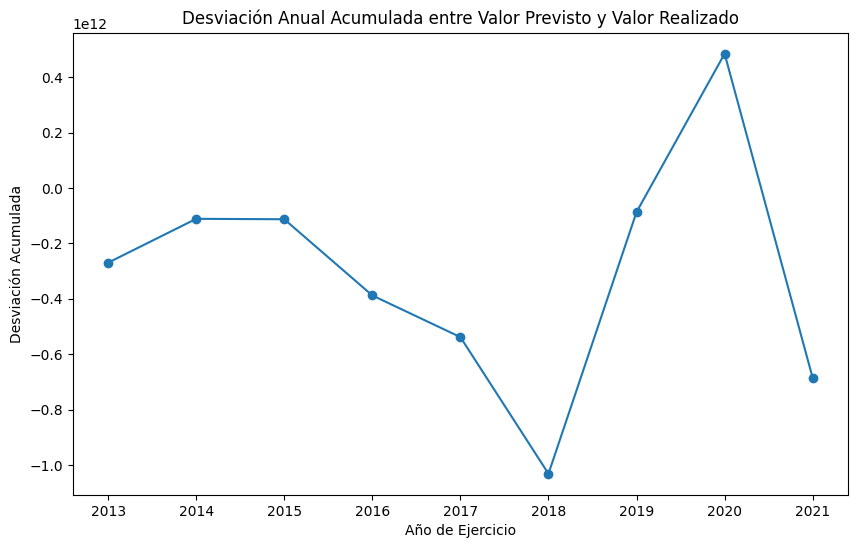

In [265]:
# Creamos una columna de diferencia entre lo realizado y lo previsto
df_unido['DIFERENCIA'] = df_unido['VALOR_REALIZADO'] - df_unido['VALOR_PREVISTO_ACTUALIZADO']

# Agrupar por año de ejercicio para obtener la desviación anual acumulada
desviacion_anual = df_unido.groupby('AÑO_EJERCICIO')['DIFERENCIA'].sum()

# Gráfico de desviación anual acumulada
plt.figure(figsize=(10, 6))
desviacion_anual.plot(marker='o')
plt.title('Desviación Anual Acumulada entre Valor Previsto y Valor Realizado')
plt.xlabel('Año de Ejercicio')
plt.ylabel('Desviación Acumulada')
plt.show()

Este gráfico muestra cómo han cambiado las previsiones de recaudación y lo que realmente se ha logrado entre 2013 y 2021, y algunas posibles explicaciones de las variaciones son las siguientes:

- Entre 2013 y 2018, la recaudación fue sistemáticamente inferior a lo previsto. Esto podría deberse a que las metas eran demasiado optimistas, a problemas económicos o a que los procesos de recaudación no estaban funcionando de manera eficiente.

- En 2019 y 2020, la recaudación superó las expectativas. Esto pudo haber sido el resultado de mejoras en los sistemas de recaudación, cambios en la administración o factores externos, como el impacto de la pandemia de COVID-19 en 2020, que pudo generar ingresos imprevistos debido a ayudas o ajustes fiscales.

- En 2021, se observa una ligera caída de nuevo. Esto podría reflejar los desafíos de adaptación tras la pandemia, con metas de recaudación que quizás no lograron anticipar del todo el contexto económico de la recuperación.

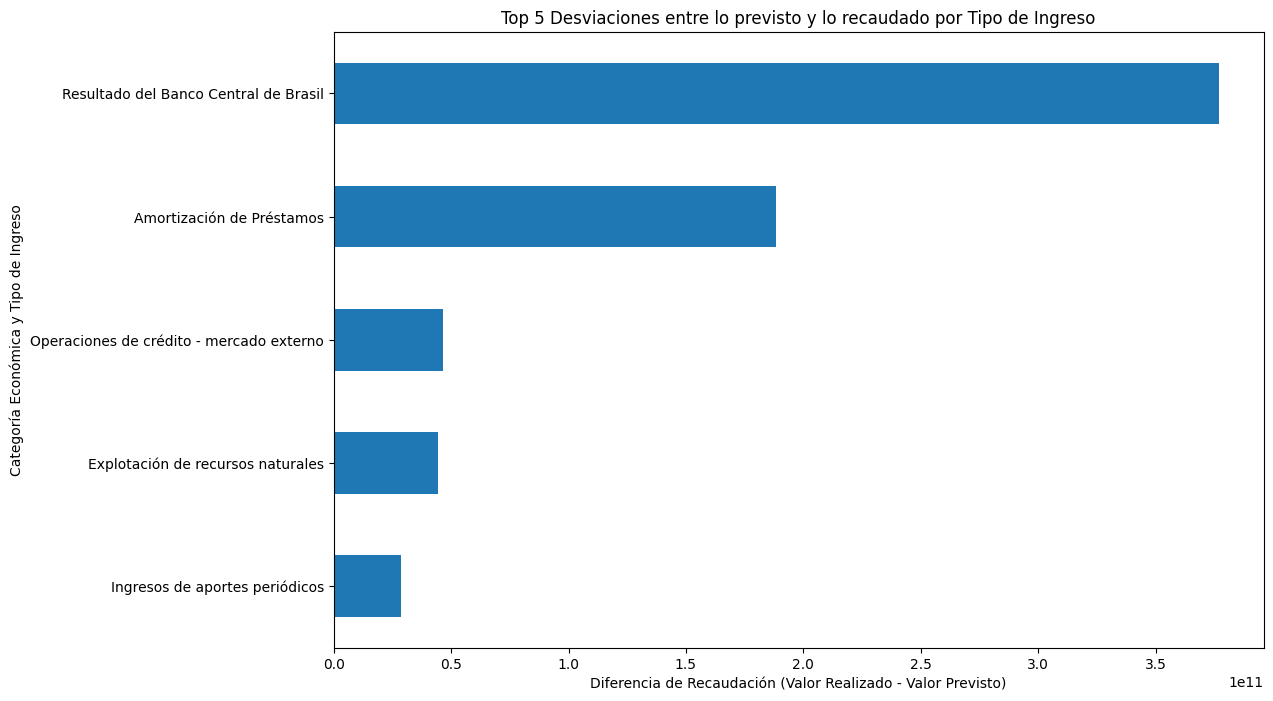

In [277]:
# Agrupar por categoría económica y tipo de ingreso, y obtener el top 5 de mayores desviaciones
desviaciones_categoria = df_unido.groupby(['TIPO_INGRESO'])['DIFERENCIA'].sum()
top_10_desviaciones = desviaciones_categoria.nlargest(5).sort_values()

# Gráfico de top 5 desviaciones por tipo de ingreso
plt.figure(figsize=(12, 8))
top_10_desviaciones.plot(kind='barh')
plt.title('Top 5 Desviaciones entre lo previsto y lo recaudado por Tipo de Ingreso')
plt.xlabel('Diferencia de Recaudación (Valor Realizado - Valor Previsto)')
plt.ylabel('Categoría Económica y Tipo de Ingreso')
plt.show()

Este gráfico muestra las 5 categorías de ingresos donde hubo mayores diferencias positivas entre lo que se esperaba recaudar y lo que realmente se logró. Aquí te explico cada una:

- Resultado del Banco Central de Brasil: Esta categoría tiene la mayor diferencia, con ingresos mucho más altos de lo esperado, probablemente por cambios en las operaciones o políticas del Banco Central.

- Amortización de Préstamos: También muestra una gran diferencia, lo que sugiere que se recibieron pagos de préstamos más altos de lo previsto. Esto podría ser por amortizaciones anticipadas o cobros que no estaban en las estimaciones iniciales.

- Operaciones de crédito - mercado externo y Explotación de recursos naturales: Ambas categorías también superaron las expectativas. Esto puede estar relacionado con cambios en los mercados internacionales o variaciones en los precios de recursos naturales.

- Ingresos de aportes periódicos: Aunque en menor medida, esta categoría también tuvo ingresos mayores a los esperados.

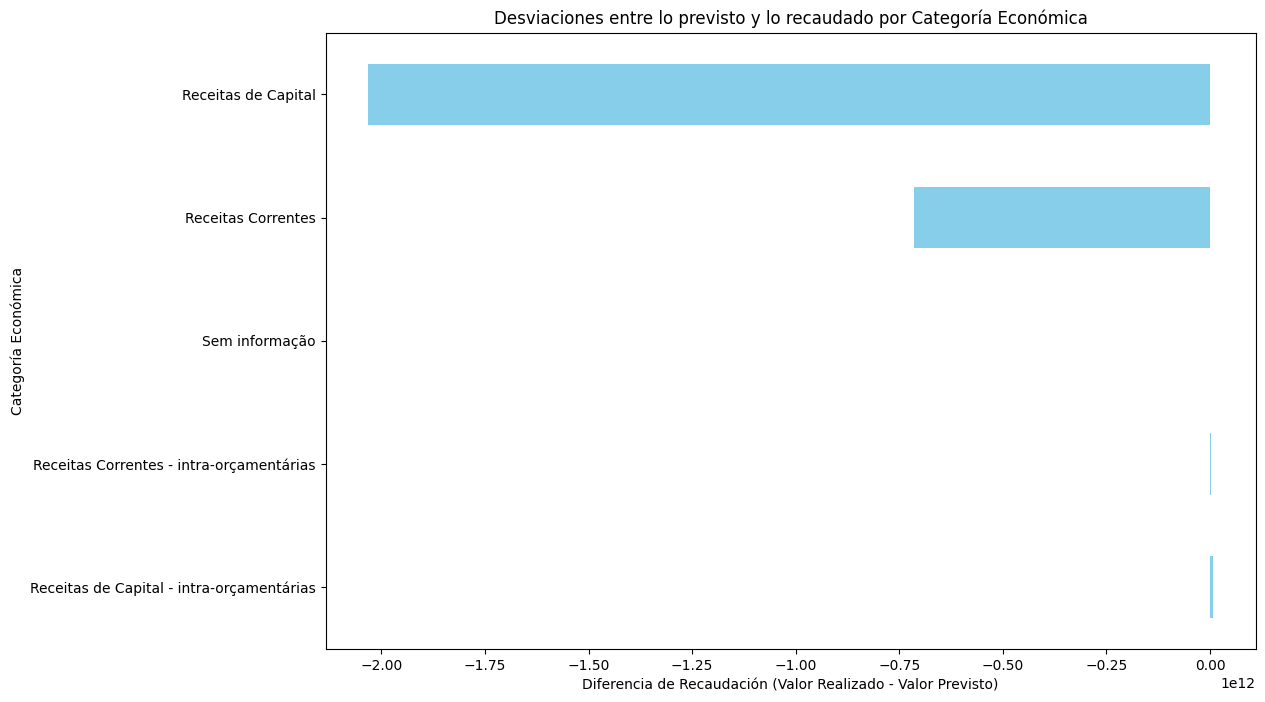

In [278]:
# Agrupar por categoría económica y tipo de ingreso
desviaciones_categoria = df_unido.groupby(['CATEGORIA_ECONOMICA'])['DIFERENCIA'].sum()
top_10_desviaciones = desviaciones_categoria.sort_values(ascending=False)

# Gráfico de top desviaciones por categoria economica
plt.figure(figsize=(12, 8))
top_10_desviaciones.plot(kind='barh', color='skyblue')
plt.title('Desviaciones entre lo previsto y lo recaudado por Categoría Económica')
plt.xlabel('Diferencia de Recaudación (Valor Realizado - Valor Previsto)')
plt.ylabel('Categoría Económica')
plt.show()

Este gráfico muestra las diferencias entre lo que se esperaba recaudar y lo que realmente se logró en distintas categorías de ingresos.

- Ingresos de Capital: Es la categoría con mayor diferencia negativa, lo que significa que se recaudó mucho menos de lo esperado. Esto podría ser resultado de estimaciones demasiado optimistas o de factores externos que afectaron estos ingresos.

- Ingresos Corrientes: También presenta una desviación negativa importante, aunque menor que en los ingresos de capital. Esto sugiere que los ingresos recurrentes estuvieron por debajo de las expectativas, tal vez debido a una desaceleración económica.

- Otras Categorías: Las desviaciones en las categorías menores fueron insignificantes, por lo que no tuvieron un impacto relevante.

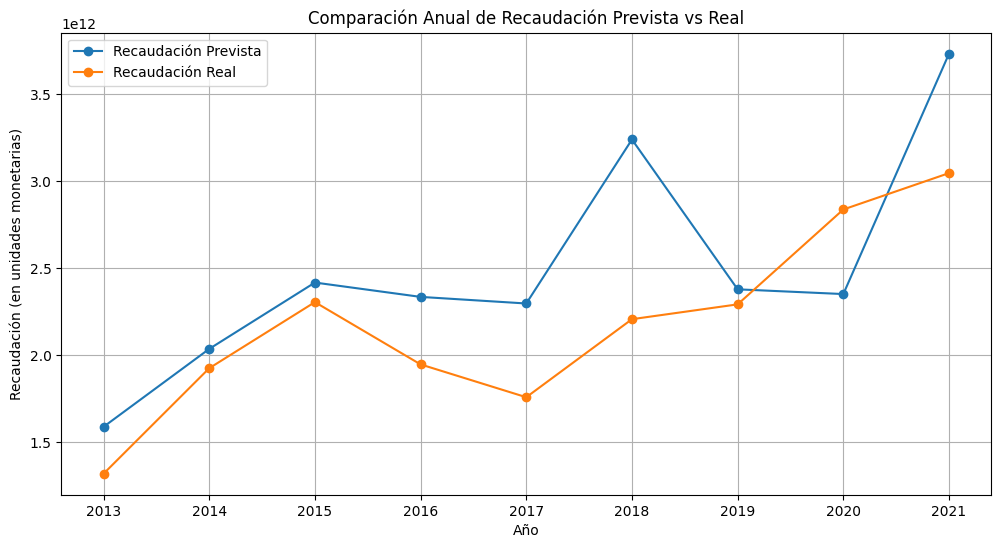

In [268]:
# Agrupar los datos por año y sumar los valores previstos y realizados
datos_anuales = df_unido.groupby('AÑO_EJERCICIO')[['VALOR_PREVISTO_ACTUALIZADO', 'VALOR_REALIZADO']].sum()

# Graficar la comparación anual de recaudación prevista vs. real
plt.figure(figsize=(12, 6))
plt.plot(datos_anuales.index, datos_anuales['VALOR_PREVISTO_ACTUALIZADO'], label='Recaudación Prevista', marker='o')
plt.plot(datos_anuales.index, datos_anuales['VALOR_REALIZADO'], label='Recaudación Real', marker='o')

plt.title('Comparación Anual de Recaudación Prevista vs Real')
plt.xlabel('Año')
plt.ylabel('Recaudación (en unidades monetarias)')
plt.legend()
plt.grid(True)
plt.show()

Este gráfico compara la recaudación prevista frente a la recaudación real entre 2013 y 2021.

- 2013-2015: La recaudación real se acerca bastante a lo previsto, aunque siempre queda un poco por debajo de las expectativas.

- 2016-2018: La brecha entre lo previsto y lo real se amplía, mostrando una recaudación significativamente menor que la esperada, con el punto más bajo en 2018.

- 2019-2021: Hay una recuperación gradual en la recaudación real, acercándose nuevamente a las previsiones en 2019 y 2020. En 2021, aunque la recaudación real crece, sigue estando por debajo de lo previsto.

C:\Users\alexc\AppData\Local\Temp\ipykernel_20508\1298004886.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  discrepancias_mensuales = df_unido.groupby('MES').apply(lambda x: (x['VALOR_PREVISTO_ACTUALIZADO'] - x['VALOR_REALIZADO']).mean())


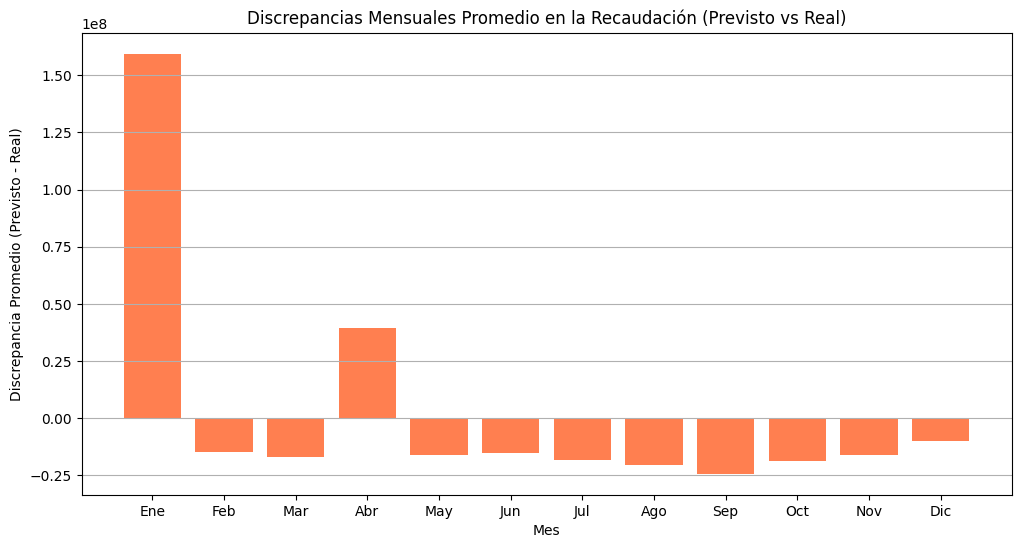

In [269]:
# Convertir FECHA_LANZAMIENTO a formato datetime para análisis mensual
df_unido['FECHA_LANZAMIENTO'] = pd.to_datetime(df_unido['FECHA_LANZAMIENTO'], errors='coerce')

# Extraer mes de FECHA_LANZAMIENTO
df_unido['MES'] = df_unido['FECHA_LANZAMIENTO'].dt.month

# Calcular discrepancias por mes tomando la diferencia media entre recaudación prevista y real
discrepancias_mensuales = df_unido.groupby('MES').apply(lambda x: (x['VALOR_PREVISTO_ACTUALIZADO'] - x['VALOR_REALIZADO']).mean())

# Graficar discrepancias mensuales
plt.figure(figsize=(12, 6))
plt.bar(discrepancias_mensuales.index, discrepancias_mensuales.values, color='coral')

plt.title('Discrepancias Mensuales Promedio en la Recaudación (Previsto vs Real)')
plt.xlabel('Mes')
plt.ylabel('Discrepancia Promedio (Previsto - Real)')
plt.xticks(range(1, 13), [
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(axis='y')
plt.show()


Este gráfico muestra cómo varía la diferencia entre lo que se esperaba recaudar y lo que realmente se recaudó a lo largo de cada mes.

- Enero: Aquí vemos la mayor diferencia positiva, es decir, la recaudación en enero fue mucho más alta de lo previsto. Esto podría deberse a algún patrón estacional o a eventos específicos que incrementan los ingresos al inicio del año.

- Abril: Aunque con menor intensidad, abril también muestra una diferencia positiva, indicando que los ingresos superaron las expectativas.

- Resto del Año: De febrero a diciembre, las diferencias son pequeñas y, en general, la recaudación tiende a estar ligeramente por debajo de lo previsto o muy cercana a las estimaciones.

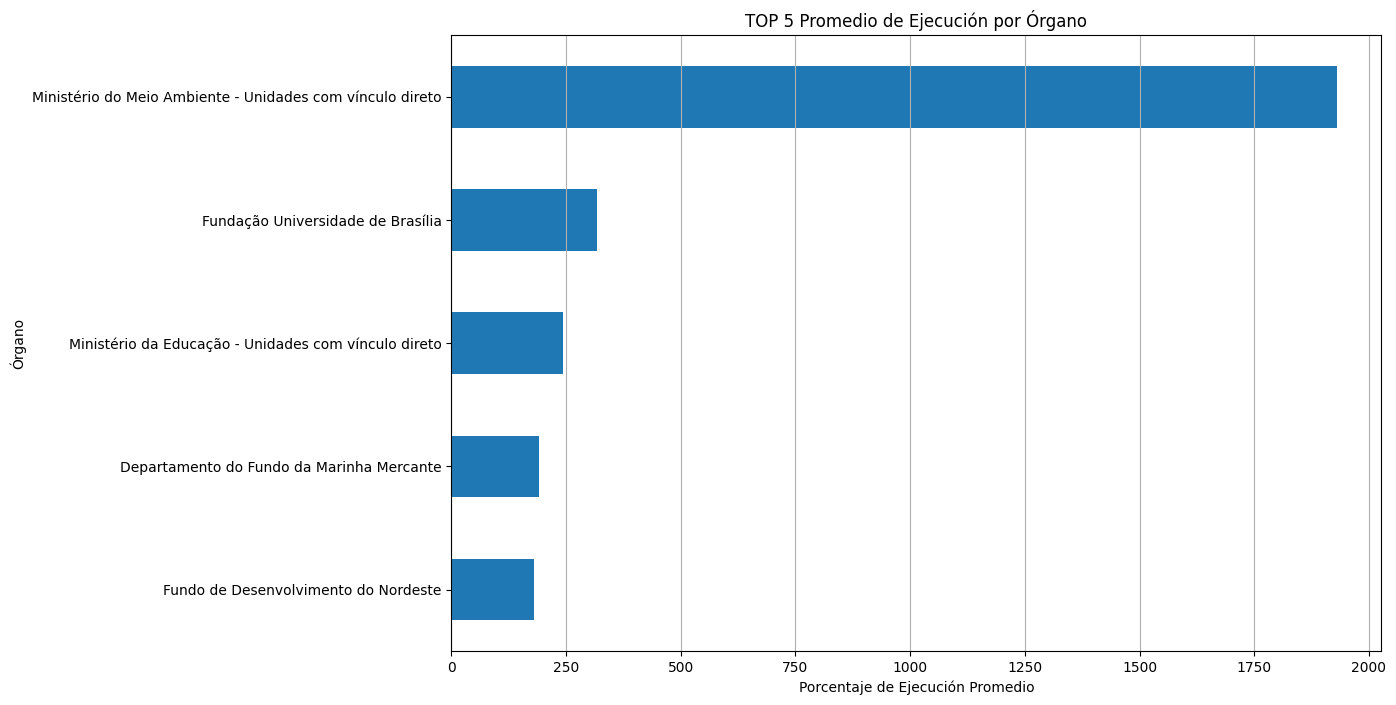

In [273]:
# Calcular el promedio de ejecución por órgano
ejecucion_por_organo = df_unido.groupby('NOMBRE_ORGANO')['PORCENTAJE_REALIZADO'].mean().nlargest(5).sort_values()

# Graficar el promedio de ejecución por órgano
plt.figure(figsize=(12, 8))
ejecucion_por_organo.plot(kind='barh')
plt.title('Top 5 Promedio de Ejecución por Órgano')
plt.xlabel('Porcentaje de Ejecución Promedio')
plt.ylabel('Órgano')
plt.grid(axis='x')
plt.show()

Este gráfico muestra los 5 órganos que mejor cumplen con sus metas de recaudación, en promedio:

- Ministerio de Medio Ambiente: Este ministerio destaca significativamente, logrando niveles de ejecución mucho mayores que los demás. Esto sugiere una gran eficiencia en alcanzar y superar sus objetivos de recaudación, posiblemente gracias a políticas efectivas o metas conservadoras.

- Fundación Universidad de Brasília y Ministerio de Educación: Ambos también tienen altos niveles de ejecución, especialmente en el sector educativo, lo que refleja una buena gestión en el cumplimiento de sus metas de recaudación.

- Departamento del Fondo de la Marina Mercante y Fondo de Desarrollo del Nordeste: Aunque en menor medida, estos fondos también muestran un desempeño sólido, ubicándolos entre los mejores en cuanto a cumplir sus objetivos.

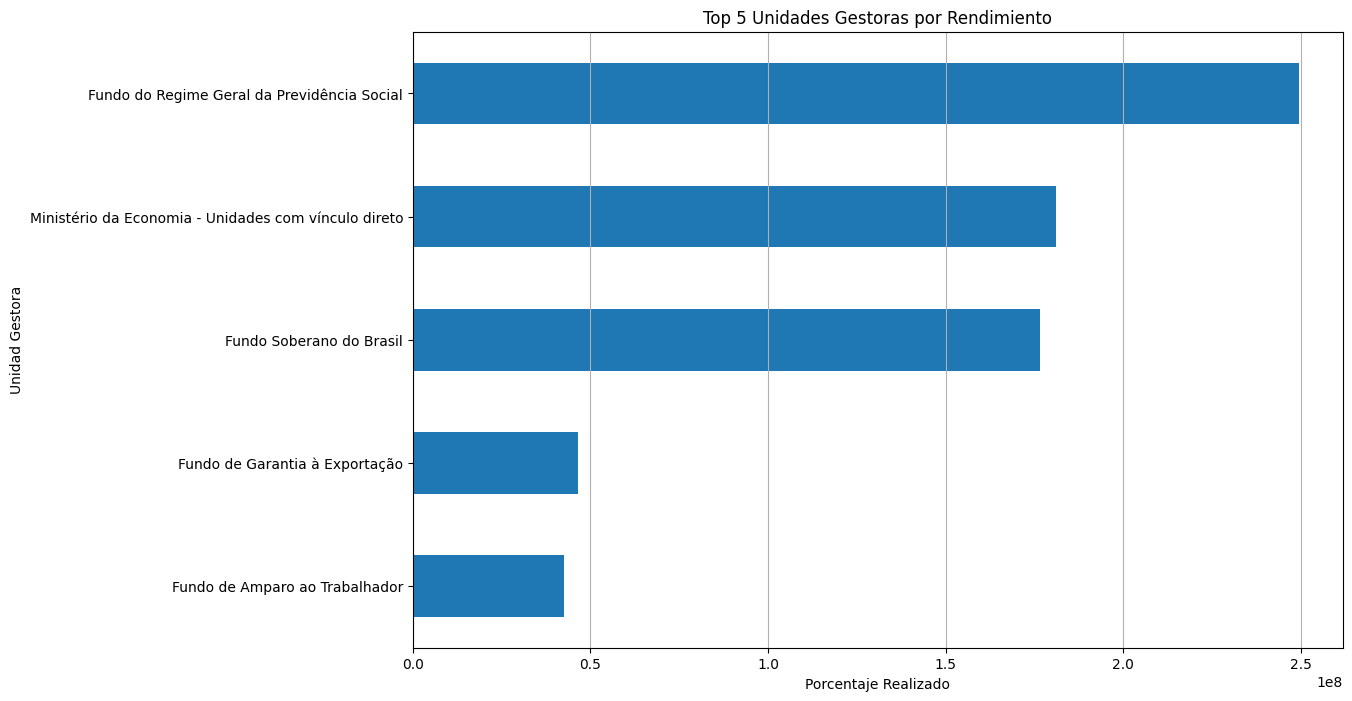

In [275]:
# Calculamos el VALOR REALIZADO promedio por ORGANO y seleccionar el top 10
rendimiento_unidades = df_unido.groupby('NOMBRE_ORGANO')['VALOR_REALIZADO'].mean().nlargest(5).sort_values()

# Gráfico de top 10 unidades gestoras por rendimiento
plt.figure(figsize=(12, 8))
rendimiento_unidades.plot(kind='barh')
plt.title('Top 5 Unidades Gestoras por Rendimiento')
plt.xlabel('Porcentaje Realizado')
plt.ylabel('Unidad Gestora')
plt.grid(axis='x')
plt.show()

Este gráfico muestra las 5 unidades gestoras que mejor han cumplido con sus metas de recaudación:

- Fondo del Régimen General de la Seguridad Social: Es la unidad con el mejor rendimiento, destacándose notablemente sobre las demás. Esto sugiere que tiene una gestión muy eficaz en el cumplimiento de sus metas, posiblemente por la importancia de estos fondos para la seguridad social.

- Ministerio de Economía: Las unidades que dependen directamente de este ministerio también tienen un alto porcentaje de ejecución, reflejando un buen control y eficiencia en su recaudación.

- Fondo Soberano de Brasil: Ocupa el tercer lugar en rendimiento, lo que muestra una gestión eficaz en el cumplimiento de sus objetivos de ingresos.

- Fondo de Garantía a la Exportación y Fondo de Amparo al Trabajador: Aunque con un rendimiento algo menor, también muestran un desempeño sólido, cumpliendo consistentemente sus metas de recaudación.

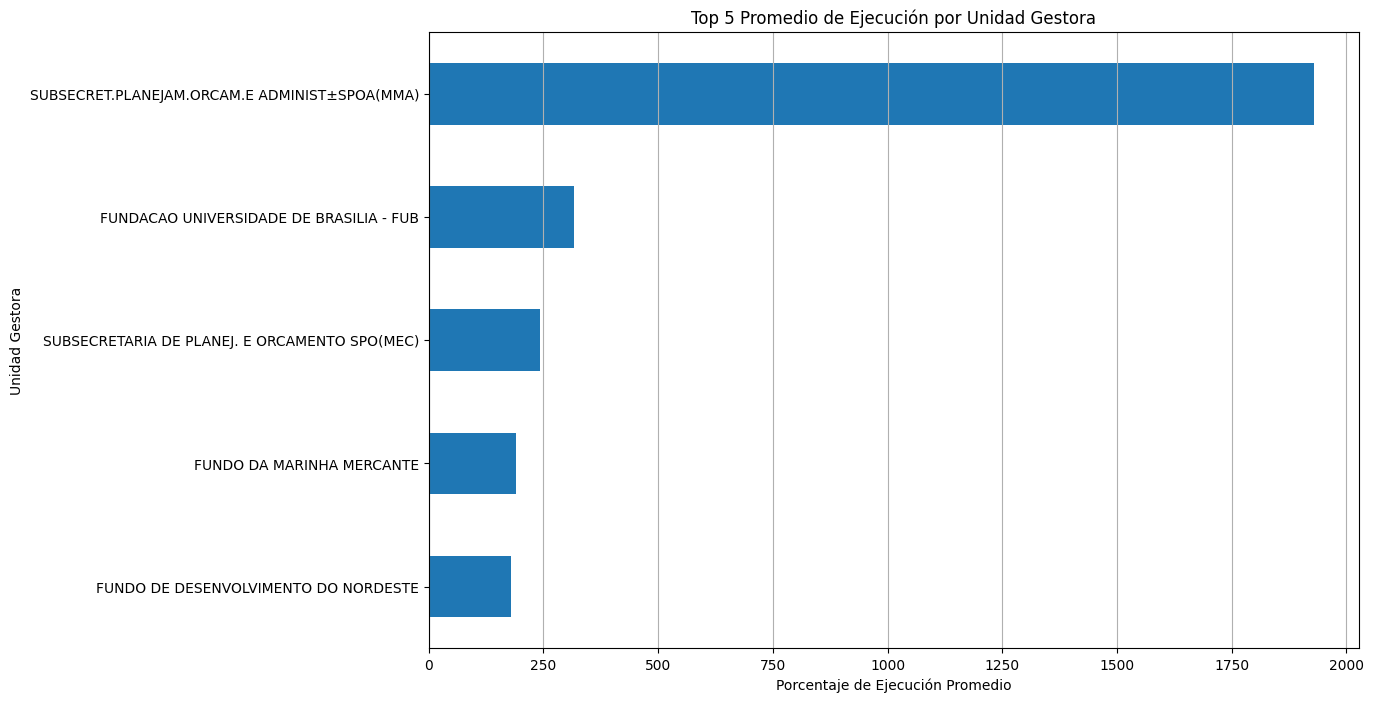

In [274]:
# Calcular el promedio de ejecución por unidad gestora
ejecucion_por_unidad = df_unido.groupby('NOMBRE_UNIDAD_GESTORA')['PORCENTAJE_REALIZADO'].mean().nlargest(5).sort_values()

# Graficar el promedio de ejecución por unidad gestora
plt.figure(figsize=(12, 8))
ejecucion_por_unidad.plot(kind='barh')
plt.title('Top 5 Promedio de Ejecución por Unidad Gestora')
plt.xlabel('Porcentaje de Ejecución Promedio')
plt.ylabel('Unidad Gestora')
plt.grid(axis='x')
plt.show()


Este gráfico muestra las 5 unidades gestoras con mejor desempeño en el cumplimiento de sus metas de recaudación:

- Subsecretaría de Planeación, Presupuesto y Administración del Ministerio de Medio Ambiente: Esta unidad se destaca de manera sobresaliente en la ejecución de su presupuesto, lo que sugiere una gestión muy eficiente en el Ministerio de Medio Ambiente.

- Fundación Universidad de Brasília y Subsecretaría de Planeación y Presupuesto del Ministerio de Educación: Ambas vinculadas al sector educativo, muestran también un alto nivel de cumplimiento, lo que indica una buena administración de los recursos en el ámbito de la educación.

- Fondo de la Marina Mercante y Fondo de Desarrollo del Nordeste: Aunque con porcentajes de ejecución algo menores, estos fondos también se posicionan entre los mejores en términos de gestión eficiente.

### Acciones para mejorar la precisión en la planificación y ejecución de los ingresos.

1. Ajustar las proyecciones según la estacionalidad

Cómo hacerlo: Identificar patrones estacionales en la recaudación para ajustar las metas mensuales, en lugar de distribuirlas de manera uniforme durante el año. Por ejemplo, ajustar las previsiones para enero, un mes donde históricamente los ingresos suelen ser mayores, permitirá tener estimaciones más precisas mes a mes.

2. Refinar las proyecciones en categorías de ingresos variables

Cómo hacerlo: Mejorar las proyecciones de ingresos de capital y corrientes, tomando en cuenta factores externos como el estado de la economía, los precios de recursos y las condiciones del mercado. Esto se puede lograr utilizando datos históricos y considerando variables externas para ajustar las proyecciones de forma más realista.

3. Aprender de las mejores prácticas de las unidades más exitosas

Cómo hacerlo: Analizar las prácticas de unidades que han logrado altos niveles de ejecución, como el Ministerio de Medio Ambiente, para entender qué están haciendo bien. Luego, aplicar estas estrategias en otras unidades que han tenido más dificultades para alcanzar sus metas de recaudación.

4. Revisiones y ajustes trimestrales

Cómo hacerlo: Establecer revisiones trimestrales para evaluar el progreso de la recaudación en relación con las metas establecidas. Esto permitirá hacer ajustes a lo largo del año, adaptando las proyecciones a medida que cambian las condiciones y mejorando la precisión de las metas.